<a href="https://colab.research.google.com/github/egbubemi/GSK_Clinicaltrial_Challenge/blob/main/Gsk_clinical_trial_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the necessary libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
clinical_study = pd.read_csv("/content/clinical-study.csv")

In [ ]:
protein_study = pd.read_csv("/content/protein-levels.csv")

In [ ]:
clinical_study.head()

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


In [ ]:
protein_study.head()

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


In [ ]:
protein_study = protein_study.rename(columns={'participant_id': 'subject_id'})

protein_study.head()


,subject_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


In [ ]:
clinical_trials = pd.merge(clinical_study, protein_study, on ='subject_id')
clinical_trials.head()

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0


In [ ]:
clinical_trials.shape

(769, 8)

In [ ]:
clinical_trials.isnull().sum().sum()

16

In [ ]:
#checking missing number of each column
clinical_trials.isnull().sum()

subject_id                0
age                       0
sex                       0
weight                   11
height                    0
trt_grp                   0
RESPONSE                  0
protein_concentration     5
dtype: int64

In [ ]:
clinical_trials = clinical_trials.fillna(clinical_trials.mean())

clinical_trials.head()

<ipython-input-115-dc4aa29f53fe>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clinical_trials = clinical_trials.fillna(clinical_trials.mean())


,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0


In [ ]:
#checking missing number of each column
clinical_trials.isnull().sum()

subject_id               0
age                      0
sex                      0
weight                   0
height                   0
trt_grp                  0
RESPONSE                 0
protein_concentration    0
dtype: int64

In [ ]:
clinical_trials = clinical_trials[clinical_trials['age'] >= 18]
clinical_trials.head()


,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0


In [ ]:
unique_numbers = clinical_trials.nunique()

print(unique_numbers)

subject_id               768
age                       39
sex                        2
weight                   729
height                    50
trt_grp                    2
RESPONSE                   2
protein_concentration    136
dtype: int64


In [ ]:
clinical_trials = clinical_trials.drop_duplicates()

In [ ]:
clinical_trials.head()

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0


In [ ]:
clinical_trials.shape

(768, 8)

In [ ]:
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 768
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             768 non-null    object 
 1   age                    768 non-null    float64
 2   sex                    768 non-null    object 
 3   weight                 768 non-null    float64
 4   height                 768 non-null    float64
 5   trt_grp                768 non-null    object 
 6   RESPONSE               768 non-null    object 
 7   protein_concentration  768 non-null    float64
dtypes: float64(4), object(4)
memory usage: 54.0+ KB


In [ ]:
clinical_trials.describe()

,age,weight,height,protein_concentration
count,768.000000,768.000000,768.000000,768.000000
mean,61.811198,91.387455,1.679271,121.686987
std,7.107447,21.977526,0.097888,30.435949
min,37.000000,46.170000,1.420000,44.000000
25%,57.000000,75.932500,1.600000,99.750000
50%,62.000000,89.150000,1.680000,117.000000
75%,67.000000,104.400000,1.760000,140.250000
max,79.000000,182.500000,1.940000,199.000000


In [ ]:
clinical_trials['bmi'] = clinical_trials['weight'] / (clinical_trials['height'] ** 2)

clinical_trials.head(8)


,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0,33.487599
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0,26.476056
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0,23.338568
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0,27.973333
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0,42.873273
6,SUBJ_006,63.0,Male,79.33,1.77,CONTROL,Y,116.0,25.321587
7,SUBJ_007,77.0,Male,96.12,1.77,CONTROL,N,78.0,30.680839
8,SUBJ_008,57.0,Male,93.50,1.63,DRUG,N,115.0,35.191388


In [ ]:
# Assuming 'df' is your DataFrame
clinical_trials = clinical_trials[['subject_id', 'age', 'sex', 'weight', 'height', 'trt_grp', 'protein_concentration', 'bmi', 'RESPONSE']]
clinical_trials.head(10)


,subject_id,age,sex,weight,height,trt_grp,protein_concentration,bmi,RESPONSE
0,SUBJ_001,46.0,Female,84.660000,1.59,DRUG,148.0,33.487599,N
2,SUBJ_002,47.0,Female,71.210000,1.64,DRUG,85.0,26.476056,Y
3,SUBJ_003,48.0,Female,69.850000,1.73,CONTROL,183.0,23.338568,N
4,SUBJ_004,59.0,Female,62.940000,1.50,DRUG,89.0,27.973333,Y
5,SUBJ_005,59.0,Female,113.910000,1.63,CONTROL,137.0,42.873273,N
6,SUBJ_006,63.0,Male,79.330000,1.77,CONTROL,116.0,25.321587,Y
7,SUBJ_007,77.0,Male,96.120000,1.77,CONTROL,78.0,30.680839,N
8,SUBJ_008,57.0,Male,93.500000,1.63,DRUG,115.0,35.191388,N
9,SUBJ_009,72.0,Male,85.570000,1.68,DRUG,197.0,30.318169,N
10,SUBJ_010,73.0,Female,91.378707,1.64,DRUG,125.0,33.974832,Y


In [ ]:
from google.colab import files

# Assuming your DataFrame is named 'df'
clinical_trials.to_csv('Gsk_data.csv', index=False)

# Download the file
files.download('Gsk_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clinical_trials.dtypes

subject_id                object
age                      float64
sex                       object
weight                   float64
height                   float64
trt_grp                   object
protein_concentration    float64
bmi                      float64
RESPONSE                  object
dtype: object

In [ ]:
#Analysis the data types
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             768 non-null    object 
 1   age                    768 non-null    float64
 2   sex                    768 non-null    object 
 3   weight                 768 non-null    float64
 4   height                 768 non-null    float64
 5   trt_grp                768 non-null    object 
 6   protein_concentration  768 non-null    float64
 7   bmi                    768 non-null    float64
 8   RESPONSE               768 non-null    object 
dtypes: float64(5), object(4)
memory usage: 60.0+ KB


In [ ]:
clinical_trials.shape

(768, 9)

In [ ]:
clinical_trials.describe()

,age,weight,height,protein_concentration,bmi
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,61.811198,91.387455,1.679271,121.686987,32.316703
std,7.107447,21.977526,0.097888,30.435949,6.877218
min,37.000000,46.170000,1.420000,44.000000,17.975421
25%,57.000000,75.932500,1.600000,99.750000,27.363995
50%,62.000000,89.150000,1.680000,117.000000,32.084107
75%,67.000000,104.400000,1.760000,140.250000,36.352665
max,79.000000,182.500000,1.940000,199.000000,67.515601


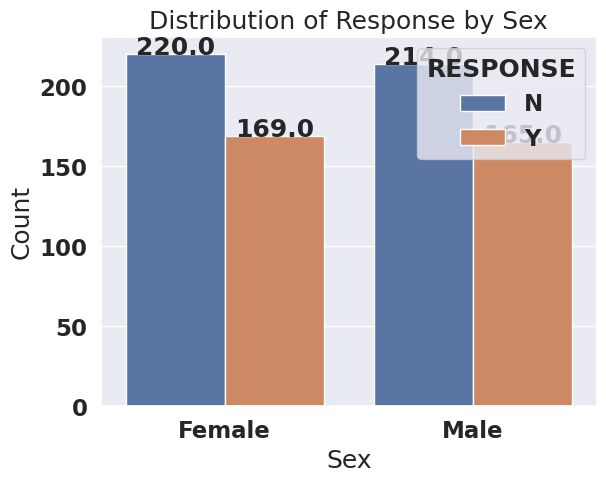

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# graph of sex against response
ax = sns.countplot(data=clinical_trials, x='sex', hue='RESPONSE')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Response by Sex')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
# print a table of the response by sex
response_by_sex = clinical_trials.groupby(['sex', 'RESPONSE']).size().unstack()

print(response_by_sex)


RESPONSE    N    Y
sex               
Female    220  169
Male      214  165


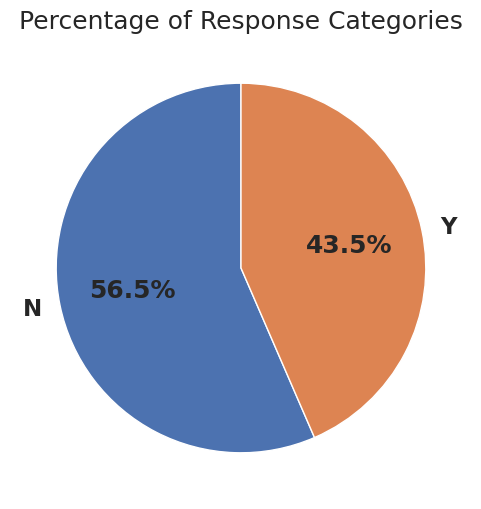

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'clinical_trials_df' is your DataFrame with 'RESPONSE' column

# Count the occurrences of each response category
response_counts = clinical_trials['RESPONSE'].value_counts()

# Calculate the percentage of each response category
response_percentages = response_counts / response_counts.sum() * 100

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(response_percentages, labels=response_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Response Categories')

plt.show()


In [ ]:
response_counts

N    434
Y    334
Name: RESPONSE, dtype: int64

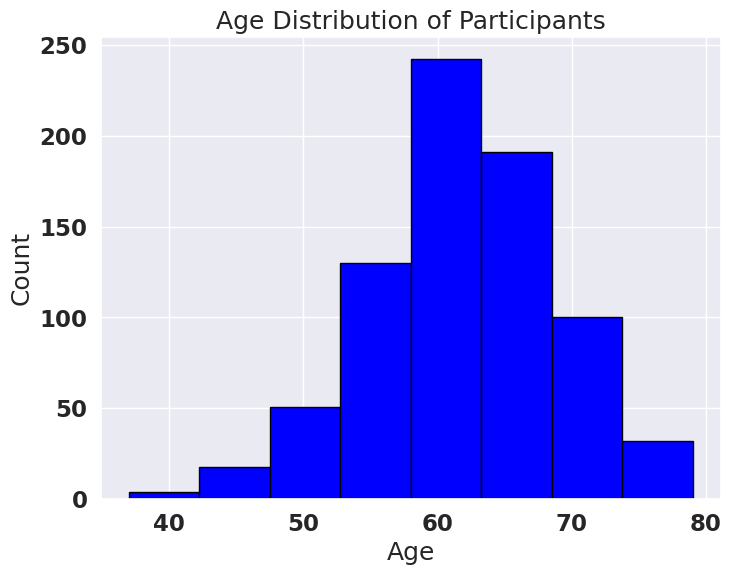

In [ ]:
#Histogram of age distribution of all participants

plt.figure(figsize=(8, 6))
plt.hist(clinical_trials['age'], bins=8, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Participants')

plt.show()


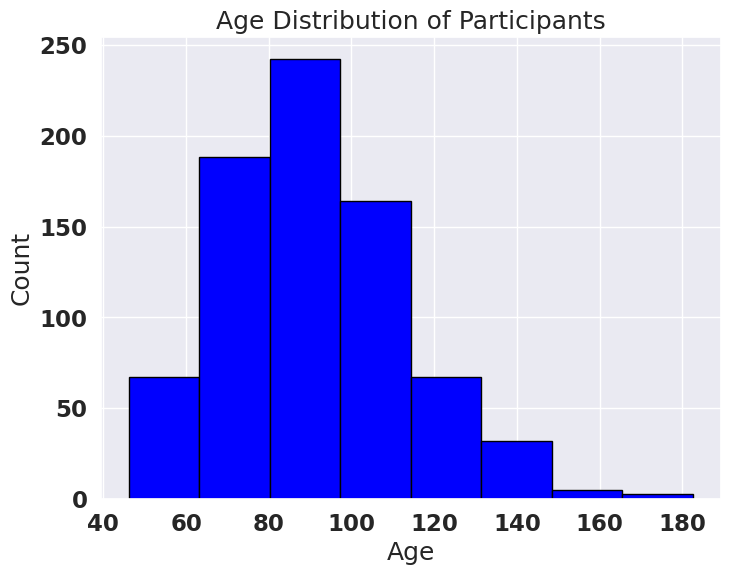

In [ ]:
#Histogram of age distribution of all participants

plt.figure(figsize=(8, 6))
plt.hist(clinical_trials['weight'], bins=8, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Participants')

plt.show()


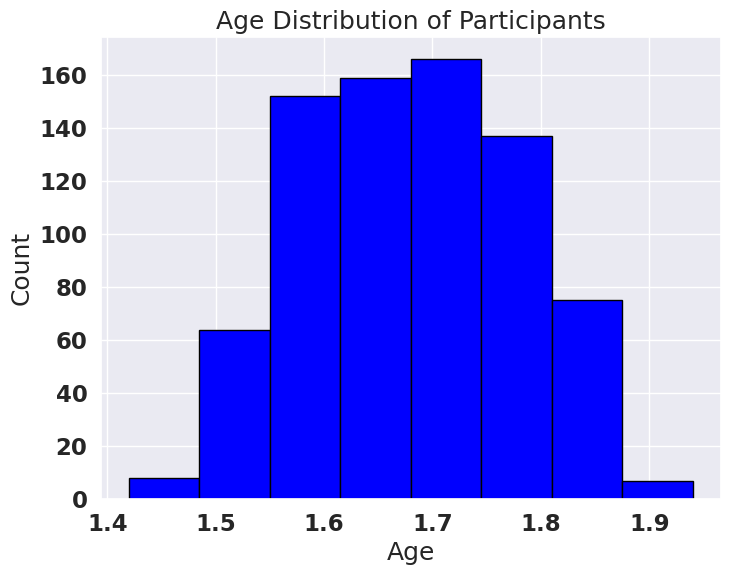

In [ ]:
#Histogram of age distribution of all participants

plt.figure(figsize=(8, 6))
plt.hist(clinical_trials['height'], bins=8, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Participants')

plt.show()


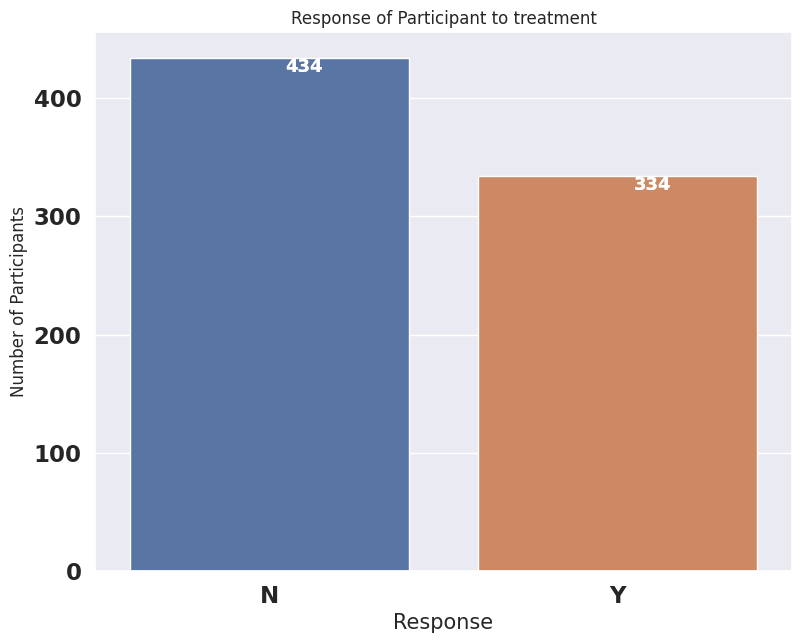

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=clinical_trials)
ax.set_title('Response of Participant to treatment' , fontsize = 12)
sns.set(font_scale=1.0)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=13)
     

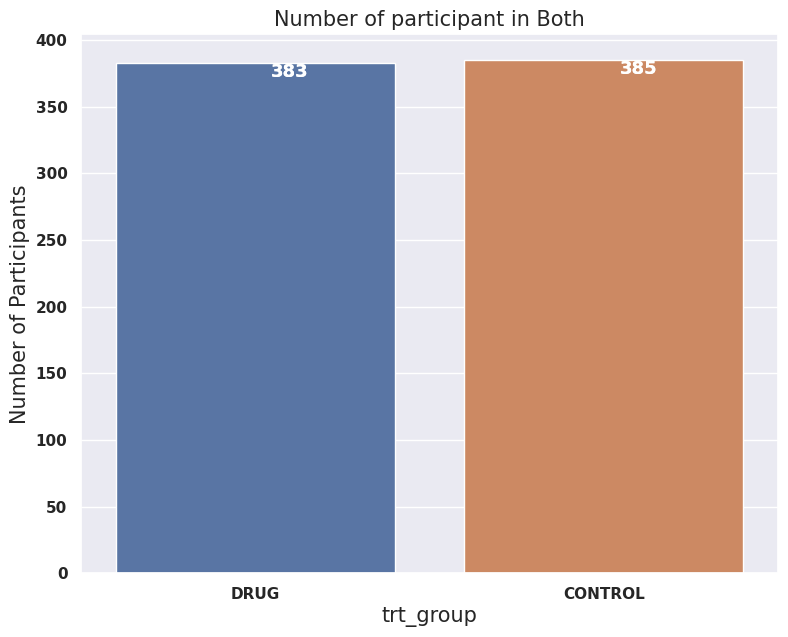

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='trt_grp', data=clinical_trials)
ax.set_title('Number of participant in Both' , fontsize = 15)
sns.set(font_scale=1.5)
plt.xlabel('trt_group', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=13)

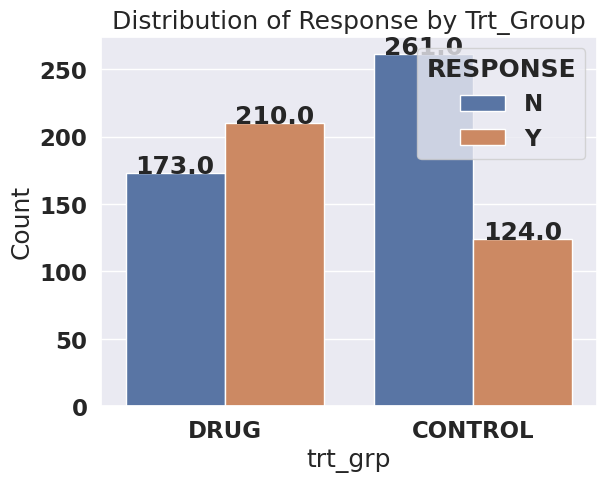

In [ ]:


# graph of sex against response
response_trt_grp = sns.countplot(data=clinical_trials, x='trt_grp', hue='RESPONSE')

plt.xlabel('trt_grp')
plt.ylabel('Count')
plt.title('Distribution of Response by Trt_Group')

# Add data labels
for p in response_trt_grp.patches:
    response_trt_grp.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


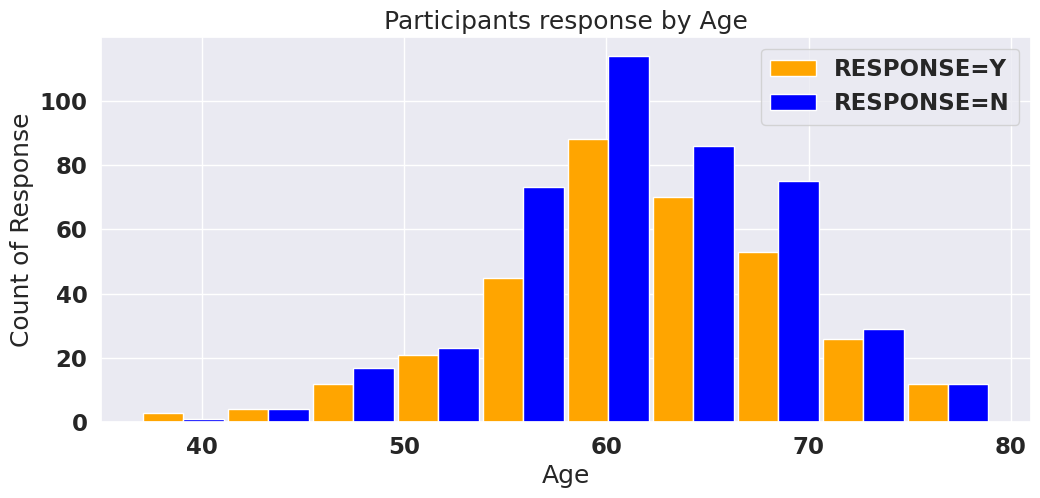

In [ ]:
# Looking at the age of each participant

resp_age_Y = clinical_trials[clinical_trials.RESPONSE=='Y'].age
resp_age_N = clinical_trials[clinical_trials.RESPONSE=='N'].age
plt.figure(figsize=(12,5))

plt.xlabel('Age')
plt.ylabel('Count of Response')
plt.title('Participants response by Age')

plt.hist([resp_age_Y, resp_age_N], rwidth= 0.95, color =['orange', 'Blue'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

In [ ]:
#For Machine Learning, we extract the data for miraculon B drug which we will be using

miraculonB_drug = clinical_trials[clinical_trials['trt_grp']=='DRUG']
miraculonB_drug

,subject_id,age,sex,weight,height,trt_grp,protein_concentration,bmi,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,148.0,33.487599,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,85.0,26.476056,Y
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,89.0,27.973333,Y
8,SUBJ_008,57.0,Male,93.50,1.63,DRUG,115.0,35.191388,N
9,SUBJ_009,72.0,Male,85.57,1.68,DRUG,197.0,30.318169,N
...,...,...,...,...,...,...,...,...,...
763,SUBJ_763,70.0,Female,62.21,1.66,DRUG,89.0,22.575846,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,122.0,36.434659,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,121.0,25.864215,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,126.0,29.972282,Y


In [ ]:
#we then drop columns that are not needed for the machine learning which are subject ID, trt_group 
#Removing participant_id
miraculonB_drug = miraculonB_drug.drop(['subject_id','trt_grp'], axis=1)
miraculonB_drug

,age,sex,weight,height,protein_concentration,bmi,RESPONSE
0,46.0,Female,84.66,1.59,148.0,33.487599,N
2,47.0,Female,71.21,1.64,85.0,26.476056,Y
4,59.0,Female,62.94,1.50,89.0,27.973333,Y
8,57.0,Male,93.50,1.63,115.0,35.191388,N
9,72.0,Male,85.57,1.68,197.0,30.318169,N
...,...,...,...,...,...,...,...
763,70.0,Female,62.21,1.66,89.0,22.575846,Y
765,65.0,Male,112.86,1.76,122.0,36.434659,N
766,60.0,Male,81.03,1.77,121.0,25.864215,N
767,53.0,Male,88.67,1.72,126.0,29.972282,Y


In [ ]:
miraculonB_drug.dtypes

age                      float64
sex                       object
weight                   float64
height                   float64
protein_concentration    float64
bmi                      float64
RESPONSE                  object
dtype: object

In [ ]:
#changing the type types of our target column and the sex to integers
miraculonB_drug['sex'].replace({'Female':0, 'Male':1}, inplace=True)

miraculonB_drug['RESPONSE'].replace({'Y':0, 'N':1}, inplace=True)

In [ ]:
miraculonB_drug

,age,sex,weight,height,protein_concentration,bmi,RESPONSE
0,46.0,0,84.66,1.59,148.0,33.487599,1
2,47.0,0,71.21,1.64,85.0,26.476056,0
4,59.0,0,62.94,1.50,89.0,27.973333,0
8,57.0,1,93.50,1.63,115.0,35.191388,1
9,72.0,1,85.57,1.68,197.0,30.318169,1
...,...,...,...,...,...,...,...
763,70.0,0,62.21,1.66,89.0,22.575846,0
765,65.0,1,112.86,1.76,122.0,36.434659,1
766,60.0,1,81.03,1.77,121.0,25.864215,1
767,53.0,1,88.67,1.72,126.0,29.972282,0


In [ ]:
#dATA pREPROCESSING
X = miraculonB_drug.iloc[:, [0,1,2,3,4,5]].values
y = miraculonB_drug.iloc[:, 6].values

In [ ]:
#spitting the dataset to train set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 412)

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=412)

# Fit the regressor on the training data
rf.fit(X_train, y_train)

# Perform feature selection
selector = SelectFromModel(rf, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = miraculonB_drug.columns[selected_feature_indices]
print("Selected feature names:", selected_feature_names)

# Scale the selected feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


Selected feature names: Index(['protein_concentration'], dtype='object')


In [ ]:
from sklearn.svm import SVC

# Create an SVM Classifier
model = SVC(random_state = 412)

# Train the model on the selected and scaled features
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8


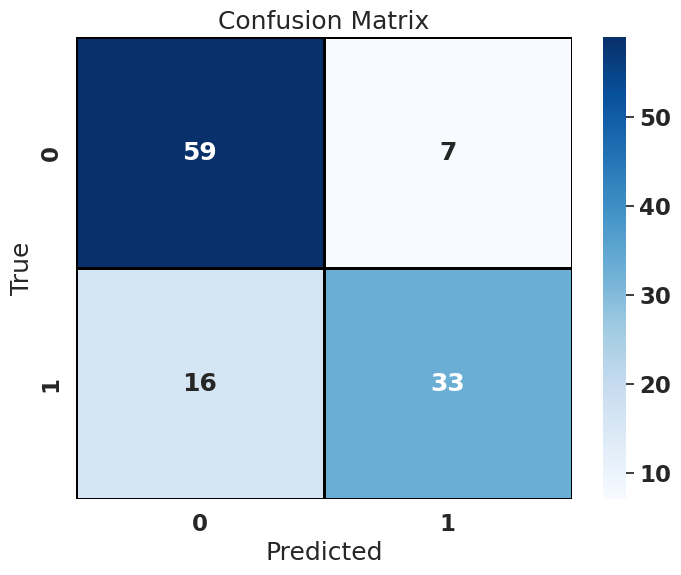

In [ ]:


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with bold font and colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Set the font weight of the annotations to bold
plt.rcParams['font.weight'] = 'bold'

# Show the plot
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
model2 = DecisionTreeClassifier(random_state = 150)

# Train the model on the selected and scaled features
model2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test_scaled)

# Evaluate the model
accuracy2 = model2.score(X_test_scaled, y_test)
print("Accuracy:", accuracy2)


Accuracy: 0.7478260869565218


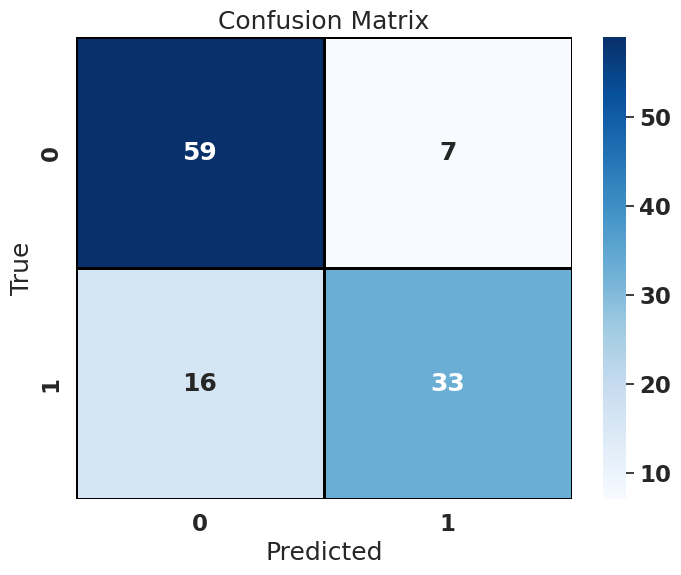

In [ ]:


# Compute the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix with bold font and colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Set the font weight of the annotations to bold
plt.rcParams['font.weight'] = 'bold'

# Show the plot
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier
model2 = DecisionTreeClassifier(random_state=100)

# Define the hyperparameters and their potential values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.8396925227113906


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
model_rf = RandomForestClassifier(random_state=180)

# Train the model on the selected and scaled features
model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = model_rf.score(X_test_scaled, y_test)
print("Accuracy (Random Forest):", accuracy_rf)


Accuracy (Random Forest): 0.7652173913043478


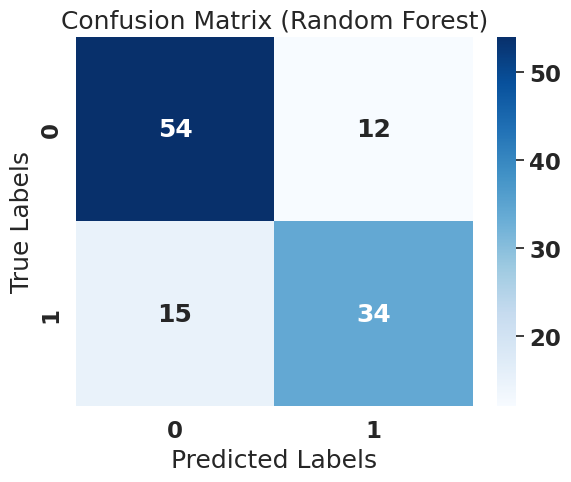

In [ ]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")

# Show the plot
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier
model_rf = RandomForestClassifier(random_state=100)

# Define the hyperparameters and their potential values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search using cross-validation
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

# Retrieve the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Print the best parameters and best score
print("Best Parameters (Random Forest):", best_params_rf)
print("Best Score (Random Forest):", best_score_rf)


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score (Random Forest): 0.8472396925227115
